In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from nsepy import get_history as gh
import googlefinance as gfc
plt.style.use('fivethirtyeight')
import plotly.graph_objs as go
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import yfinance as yf

1. Interest on Bonds: 5.95%
2. Maket Return on JCI: 0.5% (calculation from below, assuming 252 trading days)

## Market Analysis

In [16]:
market=['^JKSE']
start_date = date(2017,10,14)
end_date=date.today()
print(end_date)

2022-10-28


In [20]:
market_data=yf.download(market, start_date, end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data

Date
2017-10-16    5949.701172
2017-10-17    5947.330078
2017-10-18    5929.201172
2017-10-19    5910.529785
2017-10-20    5929.548828
                 ...     
2022-10-21    7017.770996
2022-10-24    7053.043945
2022-10-25    7048.379883
2022-10-26    7043.938965
2022-10-27    7091.761230
Name: Adj Close, Length: 1227, dtype: float64

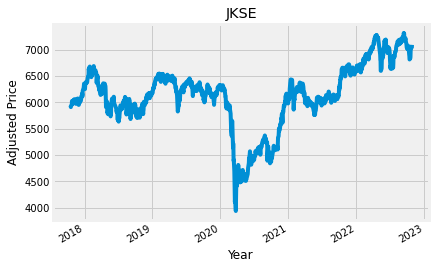

In [25]:
market_data.plot()
plt.title('JKSE')
plt.ylabel('Adjusted Price')
plt.xlabel('Year')
plt.show()

### Daily Return and Annualized Return  of The Market

In [143]:
dailymarkt_ret=market_data.pct_change(1)
dailymarkt_ret.dropna(inplace=True)
dailymarkt_ret=pd.DataFrame(dailymarkt_ret)

In [144]:
dailymarkt_ret.mean()

Adj Close    0.0002
dtype: float64

In [145]:
ann_ret=dailymarkt_ret.mean()*252
print("The annualized Return of JIC is", ann_ret)

The annualized Return of JIC is Adj Close    0.050488
dtype: float64


## CAPM for each Banks

### Visulize Data

Normlize the stock data which loops each column except date and divides the price by the initial price:

In [84]:
banks=['BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'BBNI.JK', 'BDMN.JK', 'MAYA.JK']
print(f"You have {len(banks)} assets in your porfolio" )

You have 6 assets in your porfolio


In [105]:
banks_dat=yf.download(banks, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [106]:
df

,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
Date,,,,,,
2017-10-16,3828.143555,6757.429688,2631.099854,4195.813965,5600.590332,2860.775879
2017-10-17,3786.583496,6779.880371,2639.670166,4099.579102,5681.464844,2877.603760
2017-10-18,3731.169922,6869.679688,2639.670166,4041.839111,5721.902344,2877.603760
2017-10-19,3754.258789,6892.129395,2656.810791,4022.592285,5641.027832,3020.642578
2017-10-20,3758.876709,6869.679688,2678.236572,4157.320312,5742.121582,2902.845947
...,...,...,...,...,...,...
2022-10-21,8650.000000,9000.000000,4430.000000,3440.000000,10350.000000,560.000000
2022-10-24,8900.000000,9350.000000,4500.000000,3790.000000,10250.000000,570.000000
2022-10-25,8700.000000,9425.000000,4590.000000,3780.000000,10225.000000,600.000000


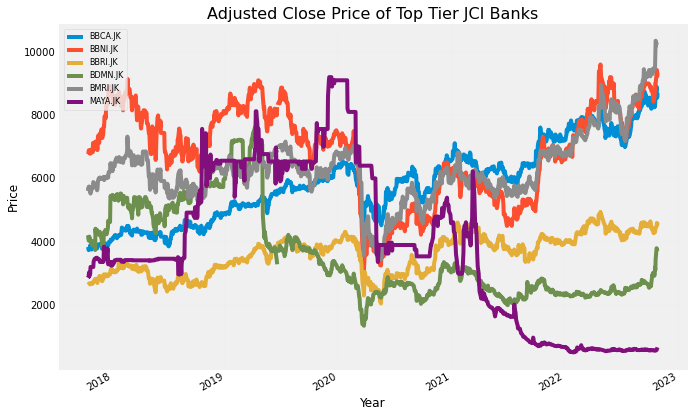

In [107]:
banks_dat.plot(figsize=(10,7))
plt.legend(loc='upper left', fontsize=8)
plt.title("Adjusted Close Price of Top Tier JCI Banks", fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.01)
plt.show()

### Normalize The Data

In [108]:
# Normalize stock data based on initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[0:]:
    x[i] = x[i]/x[i][0]
  return x

In [112]:
norm_banks=normalize(df)

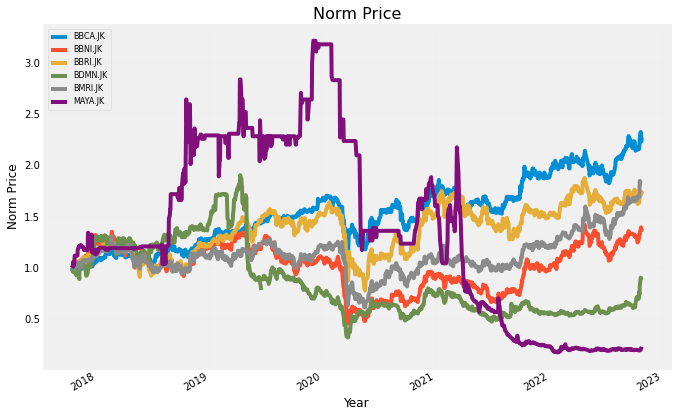

In [119]:
norm_banks.plot(figsize=(10,7))
plt.legend(loc='upper left', fontsize=8)
plt.title("Norm Price", fontsize=16)
plt.ylabel('Norm Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.01)
plt.show()

### Calculating Daily Returns

In [140]:
stocks_daily_return = banks_dat.pct_change(1)
stocks_daily_return.dropna(inplace=True)

In [141]:
stocks_daily_return

,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
Date,,,,,,
2017-10-17,-0.010856,0.003322,0.003257,-0.022936,0.014440,0.005882
2017-10-18,-0.014634,0.013245,0.000000,-0.014085,0.007118,0.000000
2017-10-19,0.006188,0.003268,0.006493,-0.004762,-0.014134,0.049708
2017-10-20,0.001230,-0.003257,0.008065,0.033493,0.017921,-0.038997
2017-10-23,0.031941,-0.013072,0.000000,-0.023148,-0.021127,0.028986
...,...,...,...,...,...,...
2022-10-21,0.017647,0.000000,0.009112,0.109677,0.045455,0.018182
2022-10-24,0.028902,0.038889,0.015801,0.101744,-0.009662,0.017857
2022-10-25,-0.022472,0.008021,0.020000,-0.002639,-0.002439,0.052632


### Calculate Beta for Each

In [161]:
df=pd.merge(dailymarkt_ret, stocks_daily_return, on='Date')

In [172]:
df.rename(columns = {'Adj Close':'JKSE'}, inplace = True)
df

,JKSE,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
Date,,,,,,,
2017-10-17,-0.000399,-0.010856,0.003322,0.003257,-0.022936,0.014440,0.005882
2017-10-18,-0.003048,-0.014634,0.013245,0.000000,-0.014085,0.007118,0.000000
2017-10-19,-0.003149,0.006188,0.003268,0.006493,-0.004762,-0.014134,0.049708
2017-10-20,0.003218,0.001230,-0.003257,0.008065,0.033493,0.017921,-0.038997
2017-10-23,0.003453,0.031941,-0.013072,0.000000,-0.023148,-0.021127,0.028986
...,...,...,...,...,...,...,...
2022-10-21,0.005317,0.017647,0.000000,0.009112,0.109677,0.045455,0.018182
2022-10-24,0.005026,0.028902,0.038889,0.015801,0.101744,-0.009662,0.017857
2022-10-25,-0.000661,-0.022472,0.008021,0.020000,-0.002639,-0.002439,0.052632


In [173]:
beta, alpha=np.polyfit(df['JKSE'], df['BBCA.JK'], 1)

In [174]:
print("The beta for BBCA is", beta, "& alpha is", alpha)

The beta for BBCA is 1.0446834827885807 & alpha is 0.000588885361061696


### Calculate CAPM for a Single Stock

In [175]:
rf=0.0595
rm=0.005
ER_BCA=rf+(beta*(rm-rf))

In [179]:
print("Expected return on Equity for BCA is", ER_BCA*100, "%")

Expected return on Equity for BCA is 0.2564750188022352 %


### Let's see how to estimate beta and alpha for a portfolio of stocks

In [180]:
beta={}
alpha={}

Use loop:

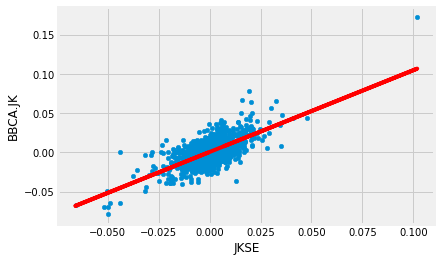

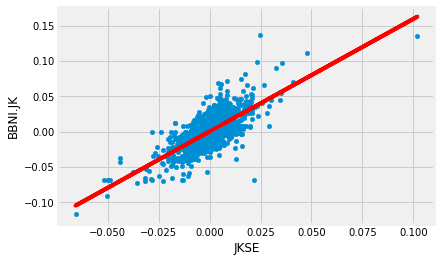

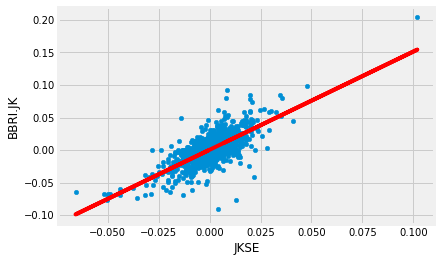

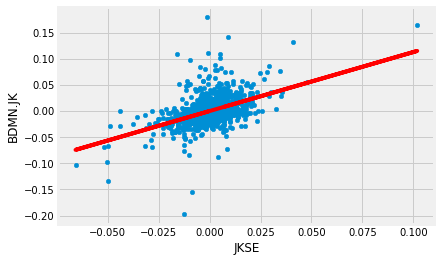

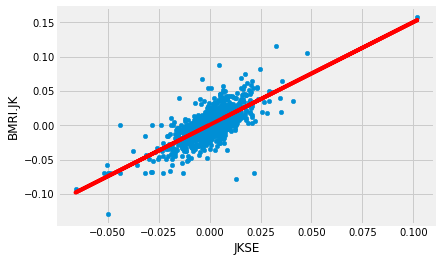

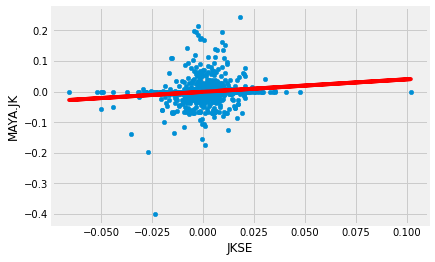

In [181]:
for i in df.columns:
    if i !='Date' and i !='JKSE':
        df.plot(kind='scatter', x='JKSE', y=i)
        b, a=np.polyfit(df['JKSE'], df[i], 1)
        plt.plot(df['JKSE'], b*df['JKSE']+a,'-', color='r')
        beta[i]=b
        alpha[i]=a
        plt.show

In [208]:
beta

{'BBCA.JK': 1.0446834827885807,
 'BBNI.JK': 1.5946404214908434,
 'BBRI.JK': 1.509857458224737,
 'BDMN.JK': 1.1286211224769447,
 'BMRI.JK': 1.4980199988595246,
 'MAYA.JK': 0.4077174177311863}

In [209]:
alpha

{'BBCA.JK': 0.000588885361061696,
 'BBNI.JK': 0.00021488830080839509,
 'BBRI.JK': 0.00039586562307666163,
 'BDMN.JK': 3.0456530456972264e-06,
 'BMRI.JK': 0.00043421509467357806,
 'MAYA.JK': -0.0006395248119530846}

### Calculating CAPM for all the stocks

In [192]:
keys=list(beta.keys())

In [210]:
rf=0.0595
rm = df['JKSE'].mean() * 252 
rm

0.050488196263490014

In [211]:
ER={}
for i in keys:
  ER[i] = rf + (beta[i] * (rm-rf)) 

In [212]:
ER

{'BBCA.JK': 0.05008551748633561,
 'BBNI.JK': 0.04512941349121896,
 'BBRI.JK': 0.04589346091637285,
 'BDMN.JK': 0.04932908795135817,
 'BMRI.JK': 0.04600013777691105,
 'MAYA.JK': 0.05582573065144989}

### Estimate roughly the expected portfolio return

In [213]:
portfolio_weights=1/6*np.ones(6)
ER_portfolio=sum(list(ER.values())*portfolio_weights)

In [214]:
print("Expected Return Based on CAPM for the portfolio is {}%\n".format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 0.048710558045607755%



## Notes

Return on equity for Maya requires the highest. Based on the previous risk and portfolio analysis, Maya is the riskiest. Thus, it requires highest return. BBNI requires the lowest return on equity.